In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [ ]:
data = {
    'HeartRate': [65, 70, 75, 80, 85, 90, 95, 100, 105, 110],
    'HeartAttack': [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
}
df = pd.DataFrame(data)

# Features and target variable
X = df[['HeartRate']]
y = df['HeartAttack']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# SVM classifier
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)


SVC(kernel='linear', random_state=42)

In [ ]:
# Predictions
y_pred = svm.predict(X_test)

# Model evaluation
print("SVM Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

SVM Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Assuming you have a trained SVM model and scaler (from the previous example)
# Replace 'svm' and 'scaler' with your trained model and scaler

def predict_heart_attack(heart_rate):
    # Create a DataFrame with the heart rate value
    data = {'HeartRate': [heart_rate]}
    df = pd.DataFrame(data)

    # Scale the input heart rate using the same scaler used for training
    scaled_heart_rate = scaler.transform(df)

    # Predict using the trained model
    prediction = svm.predict(scaled_heart_rate)

    # Interpret the prediction
    if prediction[0] == 1:
        return "Risk of heart attack"
    else:
        return "No risk of heart attack"

# Example usage:
input_heart_rate = 93  # Replace this with the heart rate value you want to predict
result = predict_heart_attack(input_heart_rate)
print(f"For a heart rate of {input_heart_rate}, the prediction is: {result}")


For a heart rate of 93, the prediction is: Risk of heart attack


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Sample dataset with columns: heart_rate, blood_pressure, ECG, physical_activity, target (1 for heart attack, 0 for no heart attack)
data = {
    'heart_rate': [80, 70, 90, 100, 85, 95, 75, 88, 92, 78],
    'blood_pressure': [120, 118, 122, 130, 125, 128, 115, 121, 127, 119],
    'ECG': [0.1, 0.2, 0.15, 0.3, 0.25, 0.18, 0.12, 0.22, 0.28, 0.21],
    'physical_activity': [30, 25, 35, 40, 32, 37, 28, 33, 36, 29],
    'target': [0, 0, 1, 1, 0, 1, 0, 1, 1, 0]  # Target: 1 - Heart Attack, 0 - No Heart Attack
}

df = pd.DataFrame(data)

# Features and target variable
X = df.drop('target', axis=1)
y = df['target']

# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model
rf_classifier.fit(X_train, y_train)

# Making predictions on the test set
predictions = rf_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, predictions)
print(f"Random Forest Accuracy: {accuracy:.2f}")

# Classification report
print(classification_report(y_test, predictions))

Random Forest Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



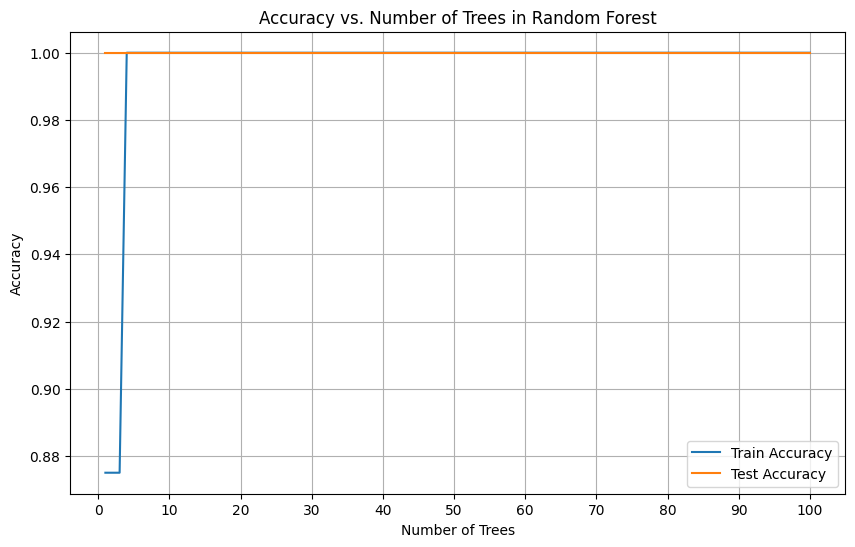

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Initialize lists to store training and testing accuracies
train_accuracy = []
test_accuracy = []

# Define a range of values for the number of trees (estimators)
estimators_range = range(1, 101)  # Adjust the range as needed

for n_estimators in estimators_range:
    # Initialize the Random Forest Classifier
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=42)

    # Fit the model
    rf_classifier.fit(X_train, y_train)

    # Training accuracy
    train_accuracy.append(rf_classifier.score(X_train, y_train))

    # Testing accuracy
    test_accuracy.append(rf_classifier.score(X_test, y_test))

# Plotting accuracy vs. number of trees
plt.figure(figsize=(10, 6))
plt.plot(estimators_range, train_accuracy, label='Train Accuracy')
plt.plot(estimators_range, test_accuracy, label='Test Accuracy')
plt.title('Accuracy vs. Number of Trees in Random Forest')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks(np.arange(0, 101, 10))  # Adjust ticks as needed
plt.grid(True)
plt.show()